In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time
import matplotlib.pyplot as plt

In [2]:
vocab_size = 10000
max_length = 200
embedding_dim = 16
num_epochs = 10

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
train_data_array = np.array(train_data)

# Now you can access the shape attribute
print(train_data_array.shape)


(25000,)


C:\Users\HP\AppData\Local\Temp\ipykernel_17012\4239428064.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_data_array = np.array(train_data)


In [6]:
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)

In [7]:
train_data.shape

(25000, 200)

In [8]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout layer added
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

D:\Anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
start_time = time.time()
history = model.fit(train_data, train_labels, epochs=num_epochs, validation_data=(test_data, test_labels), verbose=1)
train_time = time.time() - start_time
train_time

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6375 - loss: 0.6419 - val_accuracy: 0.8483 - val_loss: 0.3828
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8571 - loss: 0.3602 - val_accuracy: 0.8750 - val_loss: 0.3039
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8957 - loss: 0.2881 - val_accuracy: 0.8757 - val_loss: 0.2946
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9107 - loss: 0.2508 - val_accuracy: 0.8748 - val_loss: 0.2999
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9197 - loss: 0.2326 - val_accuracy: 0.8685 - val_loss: 0.3151
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9320 - loss: 0.2074 - val_accuracy: 0.8712 - val_loss: 0.3183
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9459 - loss: 0.1781 - val_accuracy: 0.8675 - val_loss: 0.3337
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9501 - loss: 0.1641 - val_accuracy: 0.

28.391359567642212

In [16]:
model_name = 'model_2.2_BinClass_IMDB.keras'

In [17]:
model.save(model_name)

In [19]:
model = load_model(model_name)

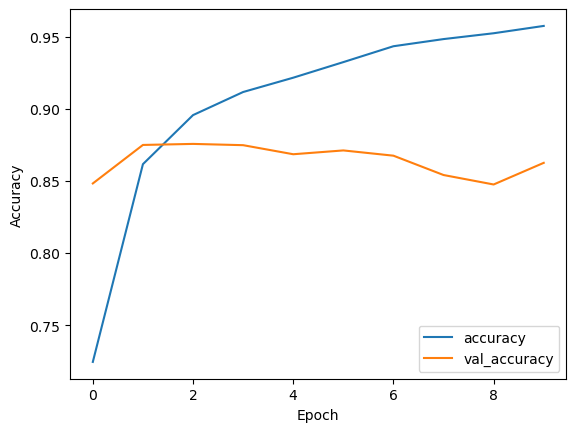

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.8650 - loss: 0.3929
Test accuracy: 0.862559974193573


In [22]:
def classify_review(review_text):
    word_index = imdb.get_word_index()
    words = review_text.lower().split()
    
    # Remove stopwords
    stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    words = [word for word in words if word not in stopwords]
    
    review = [1]
    for word in words:
        index = word_index.get(word, 0)
        if index < vocab_size:
            review.append(index + 3)
        else:
            review.append(2)
    review = pad_sequences([review], maxlen=max_length)
    start_time = time.time()
    prediction = model.predict(review)
    end_time = time.time()
    pred_time = end_time - start_time
    return "Positive" if prediction[0][0] >= 0.5 else "Negative", pred_time

In [23]:
def get_user_review():
    review = input("Please enter your movie review: ")
    return review

In [25]:
while True:
    review = get_user_review()
    classification, pred_time = classify_review(review)
    print(f"\nClassification: {classification}")
    print(f"Prediction Time: {pred_time} seconds")
    continue_input = input("Do you want to classify another review? (yes/no): ")
    if continue_input.lower() != 'yes':
        break

Please enter your movie review: amazing
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Classification: Positive
Prediction Time: 0.05553102493286133 seconds
Do you want to classify another review? (yes/no): yes
Please enter your movie review: worst
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Classification: Negative
Prediction Time: 0.05227327346801758 seconds
Do you want to classify another review? (yes/no): no
